In [71]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
import json

In [35]:
data = pd.read_csv('orders.csv', header = None )
data.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
1,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
2,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
3,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
4,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2


In [3]:
data = pd.read_csv('orders.csv', na_values = ['NA', 42420])
# we want k kuch values esy hn jo k errors hn and hm chahty hn k in ki jga null values a jayn, is liye hm n kha k 
# jab jab 'NA' likha ho ya 42420 ho vha vha null kr do yani NaN kr do 
data.head()    

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,NaN,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,NaN,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [25]:
data = pd.read_csv('orders.csv', names  =['Segment', 'City'])
data.head()

,,,,,,,,,,,,,,Segment,City
Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2


# FOR .tsv FILE

In [ ]:
data = pd.read_csv('orders.csv', sep = '\t')  
# MEANS IF WE HAVE TAB SEPRATAED FILE, WE MEANS TO KNOW PYTHON THAT SEPRATE COLUMNS ON THE BASIS OF TABS
data.head()

# if delimiter is a whitespace

In [15]:
data = pd.read_csv('orders.csv', delim_whitespace = True)
# means if values are seprated by spaces and spaces are not equal in number, then we say that when there is a 
# white space, it means there is a new value.
data.head() 

C:\Users\Asif Computer\AppData\Local\Temp\ipykernel_11568\3701779498.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('orders.csv', delim_whitespace = True)


,Order,"Id,Order","Date,Ship","Mode,Segment,Country,City,State,Postal","Code,Region,Category,Sub","Category,Product","Id,cost","price,List","Price,Quantity,Discount",Percent
0,"1,2023-03-01,Second","Class,Consumer,United","States,Henderson,Kentucky,42420,South,Furnitur...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"2,2023-08-15,Second","Class,Consumer,United","States,Henderson,Kentucky,42420,South,Furnitur...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"3,2023-01-10,Second","Class,Corporate,United","States,Los","Angeles,California,90036,West,Office","Supplies,Labels,OFF-LA-10000240,10,10,2,5",NaN,NaN,NaN,NaN,NaN
3,"4,2022-06-18,Standard","Class,Consumer,United","States,Fort","Lauderdale,Florida,33311,South,Furniture,Table...",NaN,NaN,NaN,NaN,NaN,NaN
4,"5,2022-07-13,Standard","Class,Consumer,United","States,Fort","Lauderdale,Florida,33311,South,Office","Supplies,Storage,OFF-ST-10000760,20,20,2,5",NaN,NaN,NaN,NaN,NaN


# FROM JSON files (standard way of storing data)

In [ ]:
data = pd.read_json('jasonfile.json')
data.head() 

In [ ]:
# to read file to json
data.to_json('newfile.json')  # table that is present in data, write it to newfile.json

# from sql databases

In [ ]:
Microsoft SQL Server, PostgreSQL, MySQL, AWS Redshift, Oracle Database, and the IBM Db2 family
are different DBMSs, and each one manages its own type of database. For example, in PostgreSQL DBMS 
we use a PostgreSQL database, and in MySQL DBMS we use a MySQL database. Each DBMS can only store and
manage its own database type. The SQL queries used in these systems are mostly similar, 
with some differences in syntax and features. 

In [ ]:
to get data from database, we use library sqlite3 to connect to DB 

In [ ]:
import sqlite3 as sq3
path_of_DB = 'Table creation and import data.db'
con = sq3.Connection(path_of_DB) # this will connect to DB, if this file not exist then this line will generate new .db file
query = 'select ResponseId from survey_results_2024'
pd.read_sql(query, con)   # this will generate error because sq3 created emtly file 'Table creation and import data.db' and 
#  no table survey_results_2024 exist in that file.  

In [ ]:
path = 'classic_rock.db'
con = sq3.Connection(path)
query='''
SELECT Artist, Release_Year, COUNT(*) AS num_songs, AVG(PlayCount) AS avg_plays  
    FROM rock_songs
    GROUP BY Artist, Release_Year
    ORDER BY num_songs desc;
'''
data = pd.read_sql(query, con, coerce_float = True, chunksize = 5, parse_dates = ['Release_Year'])
list(data)

# --> coerce_float : convert digit like strings into float (e.g: '123' to 123.0)
# --> chunksize: instead of loading all data in memory, IT LOAD ONE CHUNK IN MEMORY, PROCESS IT AND 
    # AFTER SHOWING RESULTS, LOAD THE NEXT CHUNK WHILE REMOVING THE PREVIOUS CHUNK FROM MEMORY
# --> parse_dates: Parse `Release_Year` as a date

In [18]:
path = 'baseball.db'
con = sq3.Connection(path)
query = 'select * from  sqlite_master'
data = pd.read_sql(query, con)
data

,type,name,tbl_name,rootpage,sql
0,table,allstarfull,allstarfull,2,"CREATE TABLE ""allstarfull"" (\n""index"" INTEGER,..."
1,index,ix_allstarfull_index,allstarfull,3,"CREATE INDEX ""ix_allstarfull_index""ON ""allstar..."
2,table,schools,schools,26,"CREATE TABLE ""schools"" (\n""index"" INTEGER,\n ..."
3,index,ix_schools_index,schools,31,"CREATE INDEX ""ix_schools_index""ON ""schools"" (""..."
4,table,batting,batting,99,"CREATE TABLE ""batting"" (\n""index"" INTEGER,\n ..."
5,index,ix_batting_index,batting,100,"CREATE INDEX ""ix_batting_index""ON ""batting"" (""..."


# From NoSQL databases (not only SQL)

In [ ]:
NoSQL databases are not relational datbases and they vary alot in their structure. 
depending upon application, they work more quickly and reduce technical overhead.

--> Document Databases: MongoDB, CouchDB (store data in Json format)
--> key-value stores :  Riak, Voldemort, Redis (store data in key-value pairs)
--> Graph databases: Neo4j, Hypergraph (for network analysis, such as linkedin having 1st-level connection, 
                                       2nd levele and 3rd level connection)
--> wide-column stores : Cassandra, HBase (certain columns are collected to make a column family.
    such as for an employee: personal column family will contain age, gender etc and professional column
    family include experience, skills etc)

## retrieving data from MongoDB database

In [ ]:
# consider a MongoDB database name "my_Mongo_data" in which a collection (just like tables in sql) 
# named "mongo_student" , we will retrieve data like this

from pymongo import MongoClient


connection = MongoClient("mongodb://localhost:27017/") # here you have to write the connection URL 
# of MOngoDB server, if it is present in local server then write respective path

DB = connection.my_mongo_data   # connect this to database

data = DB.mongo_student.find({}) # here, in mongoDB, writing {} means 'select * from table_name'
df = pd.dataframe(list(data))

In [ ]:
# retrieving data from APIs and cloud resources
data_url = 'url_link'
data = pd.read_csv(data_url, header = None)

In [ ]:
import pandas as pd

df = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})


print(df)     # Plain text
display(df)   # Nice HTML table in notebook


# OUTLIERS

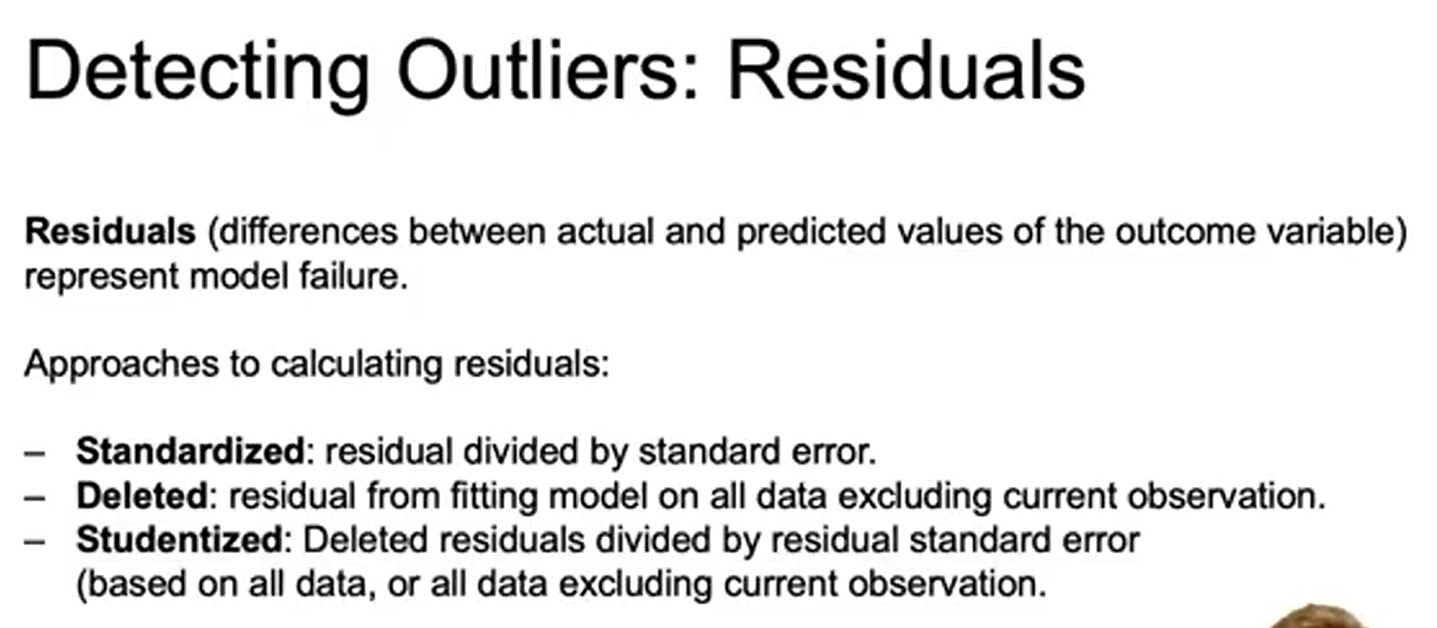

In [5]:
from IPython.display import Image, display
display(Image(filename='residuals.png', width=500, height=500))

In [ ]:
Residuals are actually the difference between the actual and predicted output. it is calculated for every 
observation in dataset. 

In [ ]:
Standardized residual: Jo error yani jo residula nikla h us ko standardize kro yani normalise kro. 
    e.g: we have 5 rows in a dataset and error/residual of each row is [-0.8, 0.6, 1.0, -0.6, -0.2], we 
will calculate the std-deviation of all these residulas and to get standardised residula of each row, we will 
divide each residual with its std-deviation.
    
        'Standardized Residual=  Residual / Standard deviation of residuals'
The standardised residual in this case would be [-0.894	0.671	1.118  -0.671  -0.224]

    
Studentised residual: also called external studentized residuals. Consider the same example of dataset having 
these residuals [-0.8, 0.6, 1.0, -0.6, -0.2], 3rd row has highgest residual, remove that row and then fit model
again and calculate new residuals and their standardised residuals by using the same above formula. If residualsd
this time havce small value means this row was the problem that was creating issue. This approch is best for 
determining outliers

Deleted Residuals: This is the residual of the deleted observation. e.g: consider the same example of 5 rows of a dataset
in which we removed row number 3. After fitting the model with the 4 rows of the dataset, we will predict the model with
the data of row number 3 (let's say row number 3 has : x=2 , y=7) , By giving model x=2, it predicted y=5, then 
7-5 is 2, this 2 is the deleted residual. means the residula of the deleted row.

## Policies of outliers 

In [ ]:
--> Remove them entirely (this is loss data as we are removing the full row)
--> replace them with mean or median
--> Transform the variable (using log transformation etc)
--> Predict using regression 

In [ ]:
'In statistics skewness is a measure of asymmetry of the distribution. In addition to skewness 
there is also a kurtosis, parameter which refers to the pointedness of a peak in the distribution curve. 
Both skewness and kurtosis are frequently used together to characterize the distribution of data'

In [ ]:
print(housing['SalePrice'].skew()) 
This will give skewness level, The level of skewness is from -3 to +3 , value of -0.5 and +0.5 
means normally distributed, value of -0.5 to -1 means negatively skewed and value of 0.5 to 1 means
negatively skewed. VALUES GREATER THAN +1 AND LESS THAN -1 MEANS HIGHLY SKEWED 